In [1]:
import math
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate

In [2]:
#判定当前的时间序列是否是单调序列
def ismonotonic(x):
    max_peaks=signal.argrelextrema(x,np.greater)[0]
    min_peaks=signal.argrelextrema(x,np.less)[0]
    all_num=len(max_peaks)+len(min_peaks)
    if all_num>0:
        return False
    else:
        return True

In [3]:
#寻找当前时间序列的极值点
def findpeaks(x):
    return signal.argrelextrema(x,np.greater)[0]

In [4]:
#判断当前的序列是否为 IMF 序列
def isImf(x):
    N=np.size(x)
    pass_zero=np.sum(x[0:N-2]*x[1:N-1]<0)#过零点的个数
    peaks_num=np.size(findpeaks(x))+np.size(findpeaks(-x))#极值点的个数
    if abs(pass_zero-peaks_num)>1:
        return False
    else:
        return True

In [5]:
#获取当前样条曲线
def getspline(x):
    N=np.size(x)
    peaks=findpeaks(x)
    print('当前极值点个数：',len(peaks))
    if(len(peaks)<=3):
        if(len(peaks)<2):
            peaks=np.concatenate(([0],peaks))
            peaks=np.concatenate((peaks,[N-1]))#这里是为了防止样条次数不够，无法插值的情况
        t=interpolate.splrep(peaks,y=x[peaks], w=None, xb=None, xe=None,k=len(peaks)-1)
        return interpolate.splev(np.arange(N),t)
    t=interpolate.splrep(peaks,y=x[peaks])
    return interpolate.splev(np.arange(N),t)
#     f=interp1d(np.concatenate(([0,1],peaks,[N+1])),np.concatenate(([0,1],x[peaks],[0])),kind='cubic')
#     f=interp1d(peaks,x[peaks],kind='cubic')
#     return f(np.linspace(1,N,N))

In [6]:
#经验模态分解方法
def emd(x):
    imf=[]
    m=0
    i=0
    while not ismonotonic(x) and  m<6:
        x1=x
        sd=np.inf
        while sd>0.01 or (not isImf(x1)):
            print (isImf(x1))
            s1=getspline(x1)
            s2=-getspline(-1*x1)
            x2=x1-(s1+s2)/2
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)
            x1=x2
        
        imf.append(x1)
        print('第%d个分量'%i)
        i=i+1
        m=(np.array(imf).shape)[0]
        print('分解个数：',m)
        x=x-x1

    imf.append(x)
    #if m>5:
        #break
    return imf

No handles with labels found to put in legend.


1200


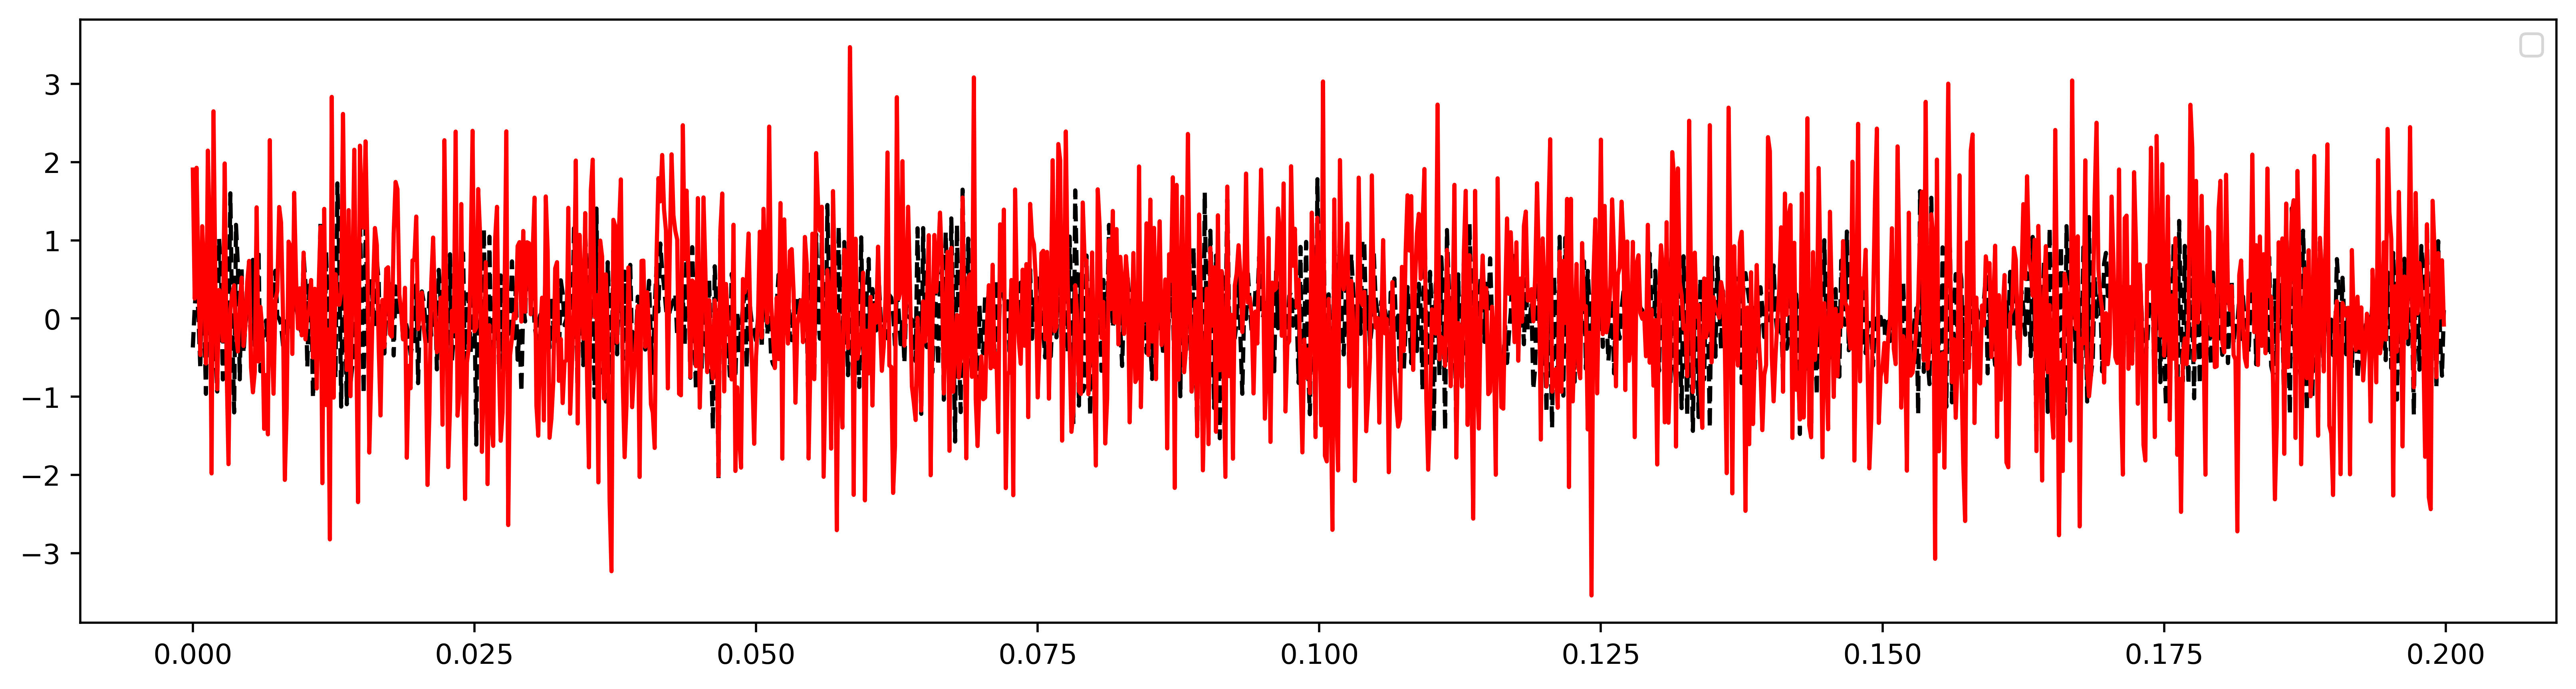

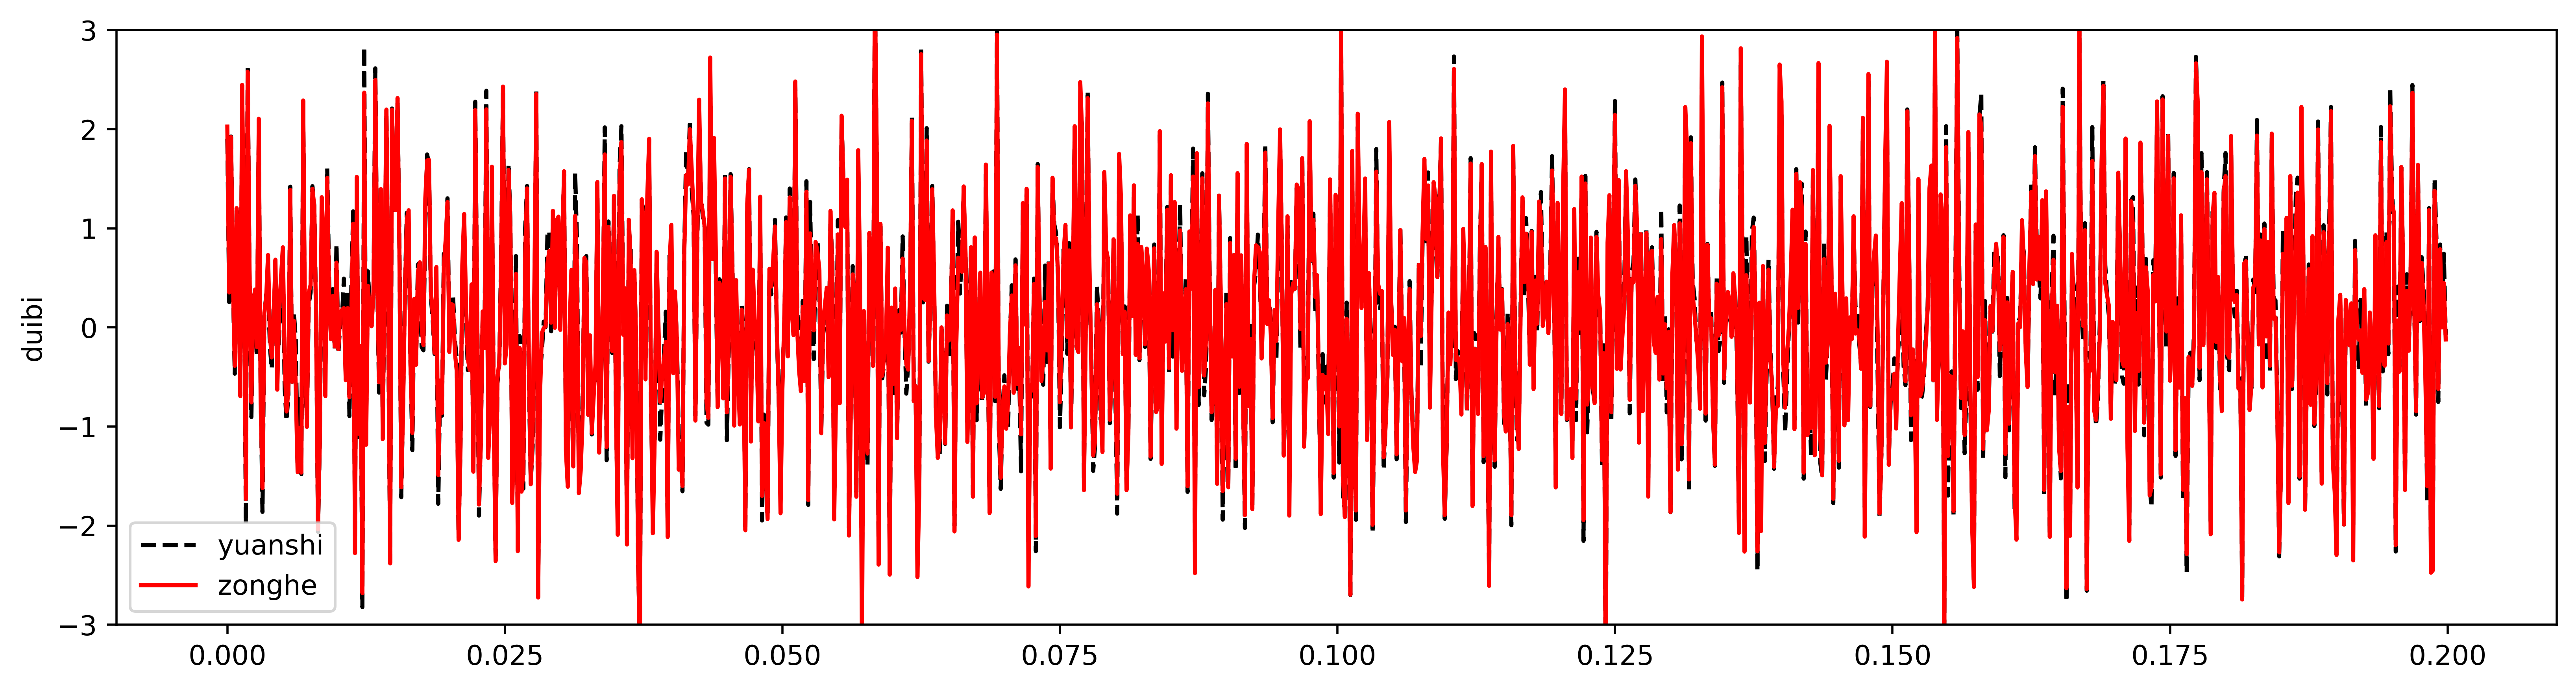

In [7]:
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)
import random
sampling_rate=6000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x1=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
x1+=wgn(x1, 3)
plt.figure(figsize=(16,4),dpi=500)
xx=x1
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')
mu = 0
sigma =1
for i in range(x1.size):
    x1[i] += random.gauss(mu,sigma)

print(len(x1))
plt.plot(t,x1,linestyle='-',marker='',color = 'red')
plt.legend()
plt.show()

m=np.random.normal(0,0.15,len(x1))
xx2=x1+m
plt.figure(figsize=(16,4),dpi=500)
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')
plt.plot(t,xx2,linestyle='-',marker='',color = 'red')
plt.ylabel('duibi')
plt.legend(['yuanshi','zonghe'])
plt.ylim((-3, 3))
plt.show()

In [8]:
print(x1)
type(x1)
print(x1.size)

[ 1.90357206  0.25567538  1.92626089 ...  0.01266641  0.74424964
 -0.07635272]
1200


In [9]:
n=10#迭代次数
o1=[]#生成n行原始数据
#o2=[]#生成n行原始数据加正噪声
#o3=[]#生成n行原始数据加负噪声
IMF=np.zeros((7,1200))#保存最终的IMF序列
#imfz=[]#保存迭代过程中的正IMF序列
#imff=[]#保存迭代过程中的负IMF序列
for i in range(n):
    o1.append(x1)
for i in range(n):
    o2=[]
    o3=[]
    m=np.random.normal(0,0.15,len(x1))
    o2=o1[i]+m
    print('shujudaxiao:',(np.array(o2)).shape)
    print((np.array(o2))[0])
    o3=o1[i]-m
    #for j in 
    imfz=emd(o2)
    imff=emd(o3)

    IMF+=(np.array(imfz)+np.array(imff))
    FIMF=IMF/n
    print(FIMF)
    print(imfz,imff)

shujudaxiao: (1200,)
2.089515771048866
False
当前极值点个数： 392
当前极值点个数： 392
False
当前极值点个数： 400
当前极值点个数： 400
False
当前极值点个数： 403
当前极值点个数： 402
False
当前极值点个数： 405
当前极值点个数： 405
False
当前极值点个数： 406
当前极值点个数： 405
False
当前极值点个数： 406
当前极值点个数： 406
False
当前极值点个数： 407
当前极值点个数： 406
False
当前极值点个数： 408
当前极值点个数： 407
False
当前极值点个数： 408
当前极值点个数： 408
False
当前极值点个数： 409
当前极值点个数： 408
False
当前极值点个数： 410
当前极值点个数： 409
False
当前极值点个数： 410
当前极值点个数： 409
False
当前极值点个数： 410
当前极值点个数： 409
False
当前极值点个数： 410
当前极值点个数： 409
False
当前极值点个数： 411
当前极值点个数： 410
False
当前极值点个数： 412
当前极值点个数： 411
False
当前极值点个数： 412
当前极值点个数： 411
False
当前极值点个数： 412
当前极值点个数： 411
False
当前极值点个数： 413
当前极值点个数： 412
False
当前极值点个数： 413
当前极值点个数： 412
False
当前极值点个数： 413
当前极值点个数： 412
False
当前极值点个数： 415
当前极值点个数： 414
第0个分量
分解个数： 1
False
当前极值点个数： 206
当前极值点个数： 207
False
当前极值点个数： 210
当前极值点个数： 210
False
当前极值点个数： 211
当前极值点个数： 211
False
当前极值点个数： 212
当前极值点个数： 212
第1个分量
分解个数： 2
False
当前极值点个数： 92
当前极值点个数： 92
True
当前极值点个数： 92
当前极值点个数： 92
False
当前极值点个数： 92
当前极值点个数： 92
第2个分量
分解个数： 

In [16]:
type(FIMF)
FIMF

array([[-3.63034784, -2.63911496,  2.97295899, ..., -0.63715934,
         0.68660963, -1.21522555],
       [ 4.77637232,  0.84645505, -1.11129169, ..., -4.51840258,
        -6.93110525, -9.78254345],
       [ 5.1574796 ,  4.82383652,  4.52740127, ..., 11.17735655,
        14.65763211, 18.77701965],
       ...,
       [-3.48714898, -3.48843007, -3.4864638 , ...,  3.68876975,
         3.94261245,  4.20391698],
       [ 7.34439249,  7.23346026,  7.12380424, ..., -1.7275589 ,
        -1.76773929, -1.8084724 ],
       [-6.02862363, -5.96563579, -5.90306425, ...,  0.48077728,
         0.48385793,  0.48692463]])

In [17]:
print(imfz,(np.array(imfz)).shape)

[array([-1.50524959, -1.26660064,  1.74542018, ..., -0.28894275,
       -0.025257  , -0.74027079]), array([  2.82367338,   0.9304319 ,  -0.07127069, ...,  -7.3288988 ,
        -9.74463203, -12.55381513]), array([ 0.21645191,  0.16210719,  0.12052289, ..., 12.0678892 ,
       15.2957427 , 19.0511129 ]), array([ -2.10450975,  -1.93593711,  -1.77480405, ...,  -9.85024333,
       -10.80082687, -11.80993676]), array([4.62011232, 4.39200931, 4.17095149, ..., 8.41940697, 8.81862346,
       9.2300555 ]), array([ 1.06679565,  1.10592241,  1.1443311 , ..., -4.9737213 ,
       -5.07064483, -5.16878288]), array([-3.13727969, -3.13128513, -3.12517536, ...,  2.04312567,
        2.06988798,  2.09687794])] (7, 1200)


In [18]:
print(imff,(np.array(imff)).shape)

[array([-0.75758746, -0.60188601,  1.59463367, ..., -0.3512012 ,
        0.72272992, -0.42776442]), array([ 0.12654219, -1.21293473, -1.67747591, ..., -3.0554944 ,
       -4.87176709, -7.08330948]), array([ 0.48827939,  0.27283572,  0.09276777, ...,  7.65872615,
       10.03676764, 12.86971494]), array([ -0.58186039,  -0.62036359,  -0.65398576, ..., -10.67838019,
       -11.69428394, -12.77170634]), array([1.6377319 , 1.52073844, 1.40780051, ..., 7.71237251, 8.1276585 ,
       8.55705924]), array([ 0.23616385,  0.21618904,  0.19648214, ..., -5.26932737,
       -5.33058685, -5.39229798]), array([0.67788039, 0.68012395, 0.68232378, ..., 3.92002164, 3.95508768,
       3.99035782])] (7, 1200)


In [19]:
zh=(np.array(imfz)+np.array(imff))
zh.shape
zh

array([[ -2.26283705,  -1.86848664,   3.34005385, ...,  -0.64014395,
          0.69747292,  -1.16803521],
       [  2.95021557,  -0.28250283,  -1.7487466 , ..., -10.38439319,
        -14.61639912, -19.63712461],
       [  0.70473131,   0.43494291,   0.21329066, ...,  19.72661535,
         25.33251035,  31.92082784],
       ...,
       [  6.25784422,   5.91274775,   5.578752  , ...,  16.13177948,
         16.94628196,  17.78711474],
       [  1.3029595 ,   1.32211146,   1.34081325, ..., -10.24304867,
        -10.40123168, -10.56108086],
       [ -2.4593993 ,  -2.45116118,  -2.44285158, ...,   5.96314732,
          6.02497566,   6.08723576]])

In [14]:
imf1=emd(x1)
n1=len(imf1)
#print(imf1)
n1

False
当前极值点个数： 389
当前极值点个数： 389
False
当前极值点个数： 404
当前极值点个数： 404
False
当前极值点个数： 406
当前极值点个数： 406
False
当前极值点个数： 408
当前极值点个数： 407
False
当前极值点个数： 410
当前极值点个数： 410
True
当前极值点个数： 410
当前极值点个数： 409
False
当前极值点个数： 411
当前极值点个数： 411
False
当前极值点个数： 413
当前极值点个数： 412
第0个分量
分解个数： 1
False
当前极值点个数： 194
当前极值点个数： 194
False
当前极值点个数： 202
当前极值点个数： 202
False
当前极值点个数： 202
当前极值点个数： 202
False
当前极值点个数： 204
当前极值点个数： 204
第1个分量
分解个数： 2
False
当前极值点个数： 88
当前极值点个数： 89
False
当前极值点个数： 88
当前极值点个数： 89
False
当前极值点个数： 91
当前极值点个数： 92
False
当前极值点个数： 92
当前极值点个数： 93
False
当前极值点个数： 94
当前极值点个数： 95
False
当前极值点个数： 94
当前极值点个数： 95
第2个分量
分解个数： 3
False
当前极值点个数： 41
当前极值点个数： 41
True
当前极值点个数： 40
当前极值点个数： 40
False
当前极值点个数： 43
当前极值点个数： 43
True
当前极值点个数： 42
当前极值点个数： 42
False
当前极值点个数： 44
当前极值点个数： 44
True
当前极值点个数： 42
当前极值点个数： 42
True
当前极值点个数： 44
当前极值点个数： 44
True
当前极值点个数： 43
当前极值点个数： 43
True
当前极值点个数： 44
当前极值点个数： 44
True
当前极值点个数： 42
当前极值点个数： 42
False
当前极值点个数： 44
当前极值点个数： 44
True
当前极值点个数： 42
当前极值点个数： 42
True
当前极值点个数： 44
当前极值点个数： 44
False
当前极值点个数：

7

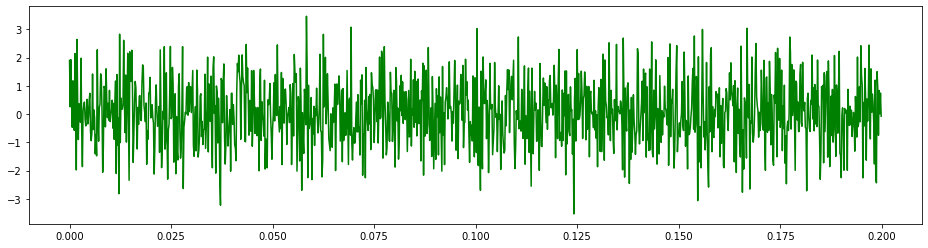

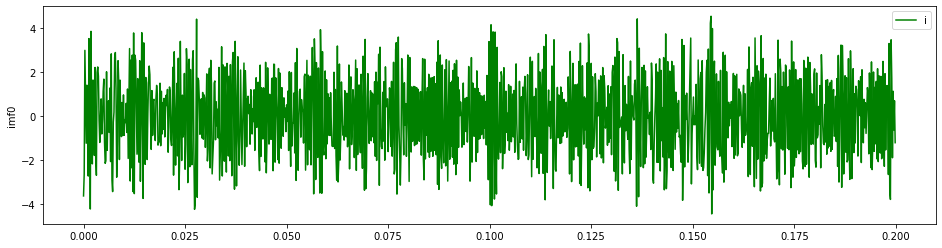

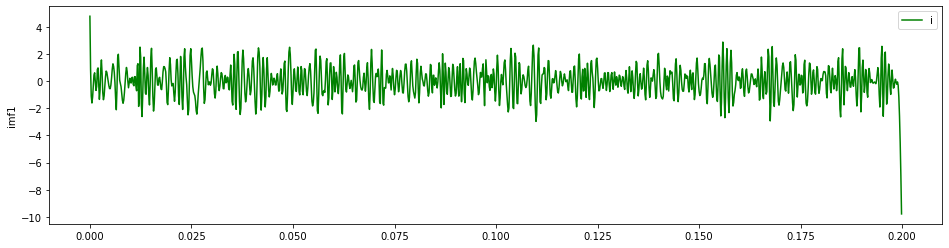

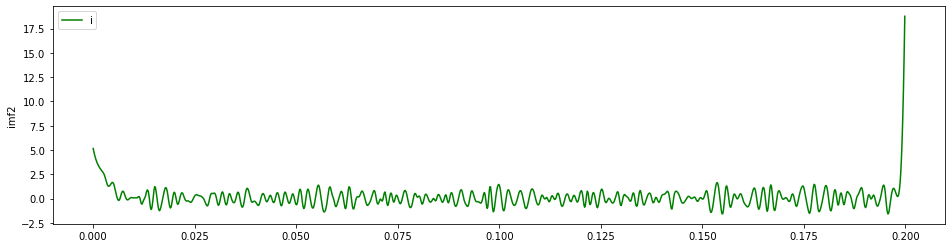

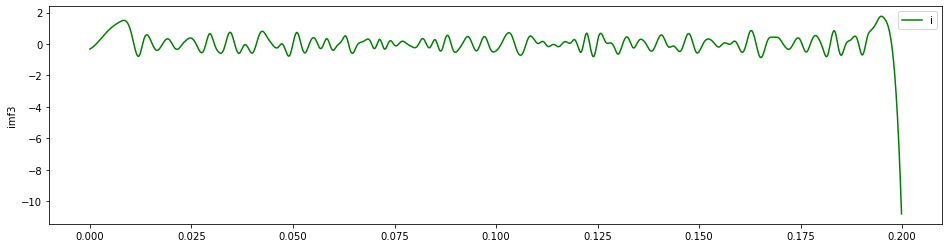

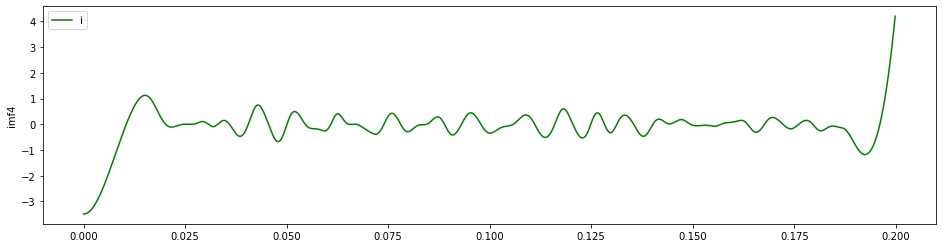

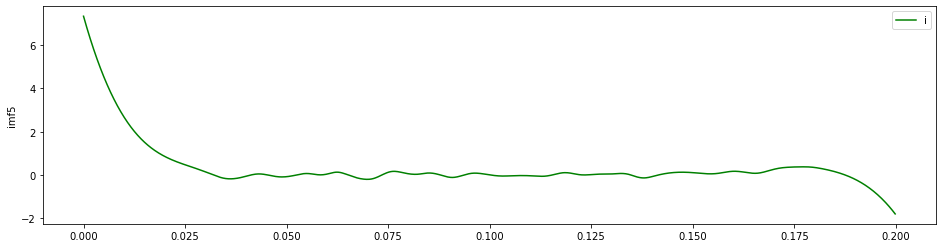

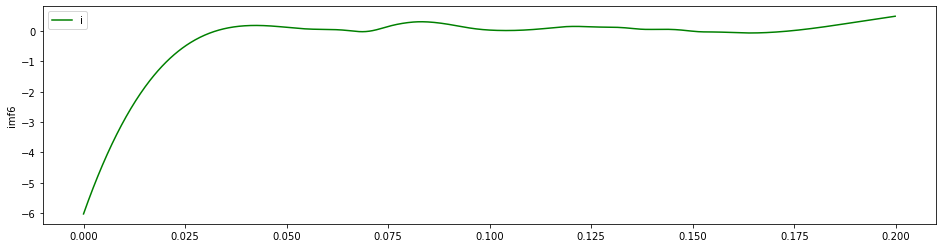

IndexError: index 7 is out of bounds for axis 0 with size 7

<Figure size 1152x288 with 0 Axes>

In [20]:
plt.figure(figsize=(16,4))
plt.plot(t,x1,'g')
for i in range(9):
    plt.figure(figsize=(16,4))
    #plt.subplot(12,1,1)
    plt.plot(t,FIMF[i],'g')
    plt.ylabel('imf%d'%(i))
    plt.legend('imf%d'%(i))
    plt.show()
plt.savefig('000.png')

In [30]:
np.zeros((10,4))+np.ones((10,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [40]:
a=[[1,2,3,4],[5,6,2,3]]
(np.array(a)).shape

(2, 4)

In [42]:
a+np.ones((2,4))

array([[2., 3., 4., 5.],
       [6., 7., 3., 4.]])